In [1]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

In [2]:
import numpy as np


Using keras to get CIFAR10 Dataset

In [3]:
(x_train,y_train),(x_test,y_test) =tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
len(y_train)

50000

In [8]:
len(y_test)

10000

Taking Automobile, Cat, Dog, and Truck from Cifar10 Dataset

In [9]:
x_train_filterd =[]
y_train_filterd =[]

for i in range( len(y_train)):
  if(y_train[i]==1 or y_train[i]==3 or y_train[i]==5 or y_train[i]==9):
    x_train_filterd.append(x_train[i])
    y_train_filterd.append(y_train[i])
    

In [10]:
len(x_train_filterd)

20000

In [11]:
len(y_train_filterd)

20000

In [12]:
x_test_filterd =[]
y_test_filterd =[]

for i in range( len(y_test)):
  if(y_test[i]==1 or y_test[i]==3 or y_test[i]==5 or y_test[i]==9):
    x_test_filterd.append(x_test[i])
    y_test_filterd.append(y_test[i])
    

In [13]:
len(x_test_filterd)

4000

In [14]:
len(y_test_filterd)

4000

Change into numpy array

In [15]:
x_train_filterd = np.array(x_train_filterd)
x_test_filterd = np.array(x_test_filterd)


In [16]:
y_test_filterd

[array([3], dtype=uint8),
 array([1], dtype=uint8),
 array([3], dtype=uint8),
 array([1], dtype=uint8),
 array([9], dtype=uint8),
 array([5], dtype=uint8),
 array([9], dtype=uint8),
 array([5], dtype=uint8),
 array([9], dtype=uint8),
 array([5], dtype=uint8),
 array([9], dtype=uint8),
 array([5], dtype=uint8),
 array([5], dtype=uint8),
 array([9], dtype=uint8),
 array([1], dtype=uint8),
 array([9], dtype=uint8),
 array([5], dtype=uint8),
 array([5], dtype=uint8),
 array([9], dtype=uint8),
 array([3], dtype=uint8),
 array([9], dtype=uint8),
 array([9], dtype=uint8),
 array([3], dtype=uint8),
 array([3], dtype=uint8),
 array([3], dtype=uint8),
 array([1], dtype=uint8),
 array([3], dtype=uint8),
 array([9], dtype=uint8),
 array([3], dtype=uint8),
 array([3], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([5], dtype=uint8),
 array([9], dtype=uint8),
 array([3], dtype=uint8),
 array([5], dtype=uint8),
 array([3], dtype=uint8),
 array([1], dtype=uint8),
 array([1], 

Change Label from

1 as Automobile to 0

3 as Cat to 1

5 as Dog to 2

9 as Truck to 3


In [17]:
for i in range(len(y_train_filterd)):
  if(y_train_filterd[i]==1):
    y_train_filterd[i]=0
  if(y_train_filterd[i]==3):
    y_train_filterd[i]=1
  if(y_train_filterd[i]==5):
    y_train_filterd[i]=2
  if(y_train_filterd[i]==9):
    y_train_filterd[i]=3
  

In [18]:
for i in range(len(y_test_filterd)):
  if(y_test_filterd[i]==1):
    y_test_filterd[i]=0
  if(y_test_filterd[i]==3):
    y_test_filterd[i]=1
  if(y_test_filterd[i]==5):
    y_test_filterd[i]=2
  if(y_test_filterd[i]==9):
    y_test_filterd[i]=3

In [19]:
y_train_filterd = np.array(y_train_filterd)


In [20]:
y_train_filterd

array([3, 3, 0, ..., 3, 0, 0])

In [21]:
x_train_filterd.shape

(20000, 32, 32, 3)

In [22]:
y_train_filterd.shape

(20000,)

Change y_tain into categorical

In [23]:
from keras.utils import np_utils

In [24]:
y_train_filterd= np_utils.to_categorical(y_train_filterd)


Define Model

In [25]:
# We use the Sequential model in keras which is used 99% of the time 
model = tf.keras.Sequential() 

#convo 
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu')) 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.Flatten()) 
# A fully connected layer 
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(32, activation='relu')) 
# We add an output layer that uses softmax activation for the 4 classes 
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])


In [26]:
x_train_filterd.shape

(20000, 32, 32, 3)

In [27]:
y_train_filterd.shape

(20000, 4)

Training model

In [28]:
model.fit(x_train_filterd, y_train_filterd, epochs=20)


Epoch 1/20
625/625 [==============================] - 10s 4ms/step - loss: 4.1619 - accuracy: 0.4881
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.6654 - accuracy: 0.7012
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4867 - accuracy: 0.7930
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3177 - accuracy: 0.8720
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2277 - accuracy: 0.9122
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1387 - accuracy: 0.9522
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1283 - accuracy: 0.9532
Epoch 8/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1085 - accuracy: 0.9635
Epoch 9/20
625/625 [==============================] - 3s 4ms/step - loss: 0.0963 - accuracy: 0.9679
Epoch 10/20
625/625 [==============================] - 3s 4ms/step - loss: 0.0804 - accuracy: 0.972

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/


Predict Model

In [29]:
y_pred=model.predict_classes(x_test_filterd)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
y_pred

array([1, 0, 1, ..., 1, 2, 0])

Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(y_test_filterd,y_pred)

In [33]:
import seaborn as sn

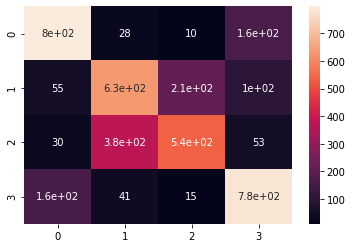

In [34]:
sn.heatmap(cm, annot=True)

Classification Report

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test_filterd, y_pred, target_names=["Automobile","cat","dog","truck"]))

              precision    recall  f1-score   support

  Automobile       0.76      0.80      0.78      1000
         cat       0.59      0.63      0.61      1000
         dog       0.70      0.54      0.61      1000
       truck       0.71      0.78      0.75      1000

    accuracy                           0.69      4000
   macro avg       0.69      0.69      0.69      4000
weighted avg       0.69      0.69      0.69      4000



Using the model suggested the precision of the model isn't that good and isn't that bad but can be improved by changing the model.